In [2]:
using CairoMakie

In [3]:
using Arya

In [4]:
import LilGuys as lguys

In [5]:
out = lguys.Output("../models/tests/twobody/out/combined.hdf5")

<output with 101 snapshots of 2 particles>

In [6]:
pos = lguys.extract_vector(out, :positions)

3×2×101 Array{Float64, 3}:
[:, :, 1] =
 1.0  -1.0
 0.0   0.0
 0.0   0.0

[:, :, 2] =
 0.998808   -0.998808
 0.0292852  -0.0292852
 0.0         0.0

[:, :, 3] =
 0.995228   -0.995228
 0.0585004  -0.0585004
 0.0         0.0

;;; … 

[:, :, 99] =
  0.353233  -0.353233
 -0.467659   0.467659
  0.0        0.0

[:, :, 100] =
  0.416101  -0.416101
 -0.468102   0.468102
  0.0        0.0

[:, :, 101] =
  0.474934  -0.474934
 -0.463982   0.463982
  0.0        0.0

In [7]:
acc = lguys.extract_vector(out, :accelerations)

3×2×101 Array{Float64, 3}:
[:, :, 1] =
 -0.25  0.25
  0.0   0.0
  0.0   0.0

[:, :, 2] =
 -0.250274    0.250274
 -0.00733809  0.00733809
  0.0         0.0

[:, :, 3] =
 -0.251101   0.251101
 -0.0147599  0.0147599
  0.0        0.0

;;; … 

[:, :, 99] =
 -0.438683   0.438683
  0.58079   -0.58079
  0.0        0.0

[:, :, 100] =
 -0.423427   0.423427
  0.476343  -0.476343
  0.0        0.0

[:, :, 101] =
 -0.405648   0.405648
  0.396294  -0.396294
  0.0        0.0

In [8]:
a = dropdims(sqrt.(sum(acc .^ 2, dims=1)), dims=1)[1, :]

101-element Vector{Float64}:
 0.25
 0.25038197385145267
 0.25153402654907486
 0.25371324989057015
 0.2565586104536844
 0.26027594300471674
 0.2649293488022773
 0.2712292243908582
 0.27814655357491586
 0.2863379154519371
 0.29597503736816055
 0.308504946424345
 0.3219488752510054
 ⋮
 4.750288702512765
 5.123690592300077
 4.2004538874138
 3.052414336394495
 2.209130996425322
 1.6141867763220996
 1.2664199819373363
 1.0293311419946178
 0.8614149965398932
 0.7278466197665348
 0.6373326505629984
 0.5670971053543004

In [9]:
vec12 = pos[:, 1, :] .- pos[:, 2, :]

3×101 Matrix{Float64}:
 2.0  1.99762    1.99046   1.97705   …   0.706466   0.832203   0.949867
 0.0  0.0585705  0.117001  0.180943     -0.935319  -0.936204  -0.927965
 0.0  0.0        0.0       0.0           0.0        0.0        0.0

In [10]:
r12 = dropdims(sqrt.(sum(vec12 .^ 2, dims=1)), dims=1)

101-element Vector{Float64}:
 2.0
 1.9984738016046677
 1.9938919665627934
 1.9853104339988858
 1.9742707214993844
 1.9601214720875715
 1.942830744216157
 1.9201349772785468
 1.8961084483898552
 1.8687903290767298
 1.8381140562133178
 1.80039972523083
 1.7624084112165264
 ⋮
 0.45881753774897577
 0.4417825396384902
 0.4879236633134126
 0.5723718598995984
 0.6728050884906266
 0.7870876446591042
 0.8886098492376744
 0.985649350172039
 1.0774417534277256
 1.1721415795054313
 1.252612993249258
 1.3279180532712132

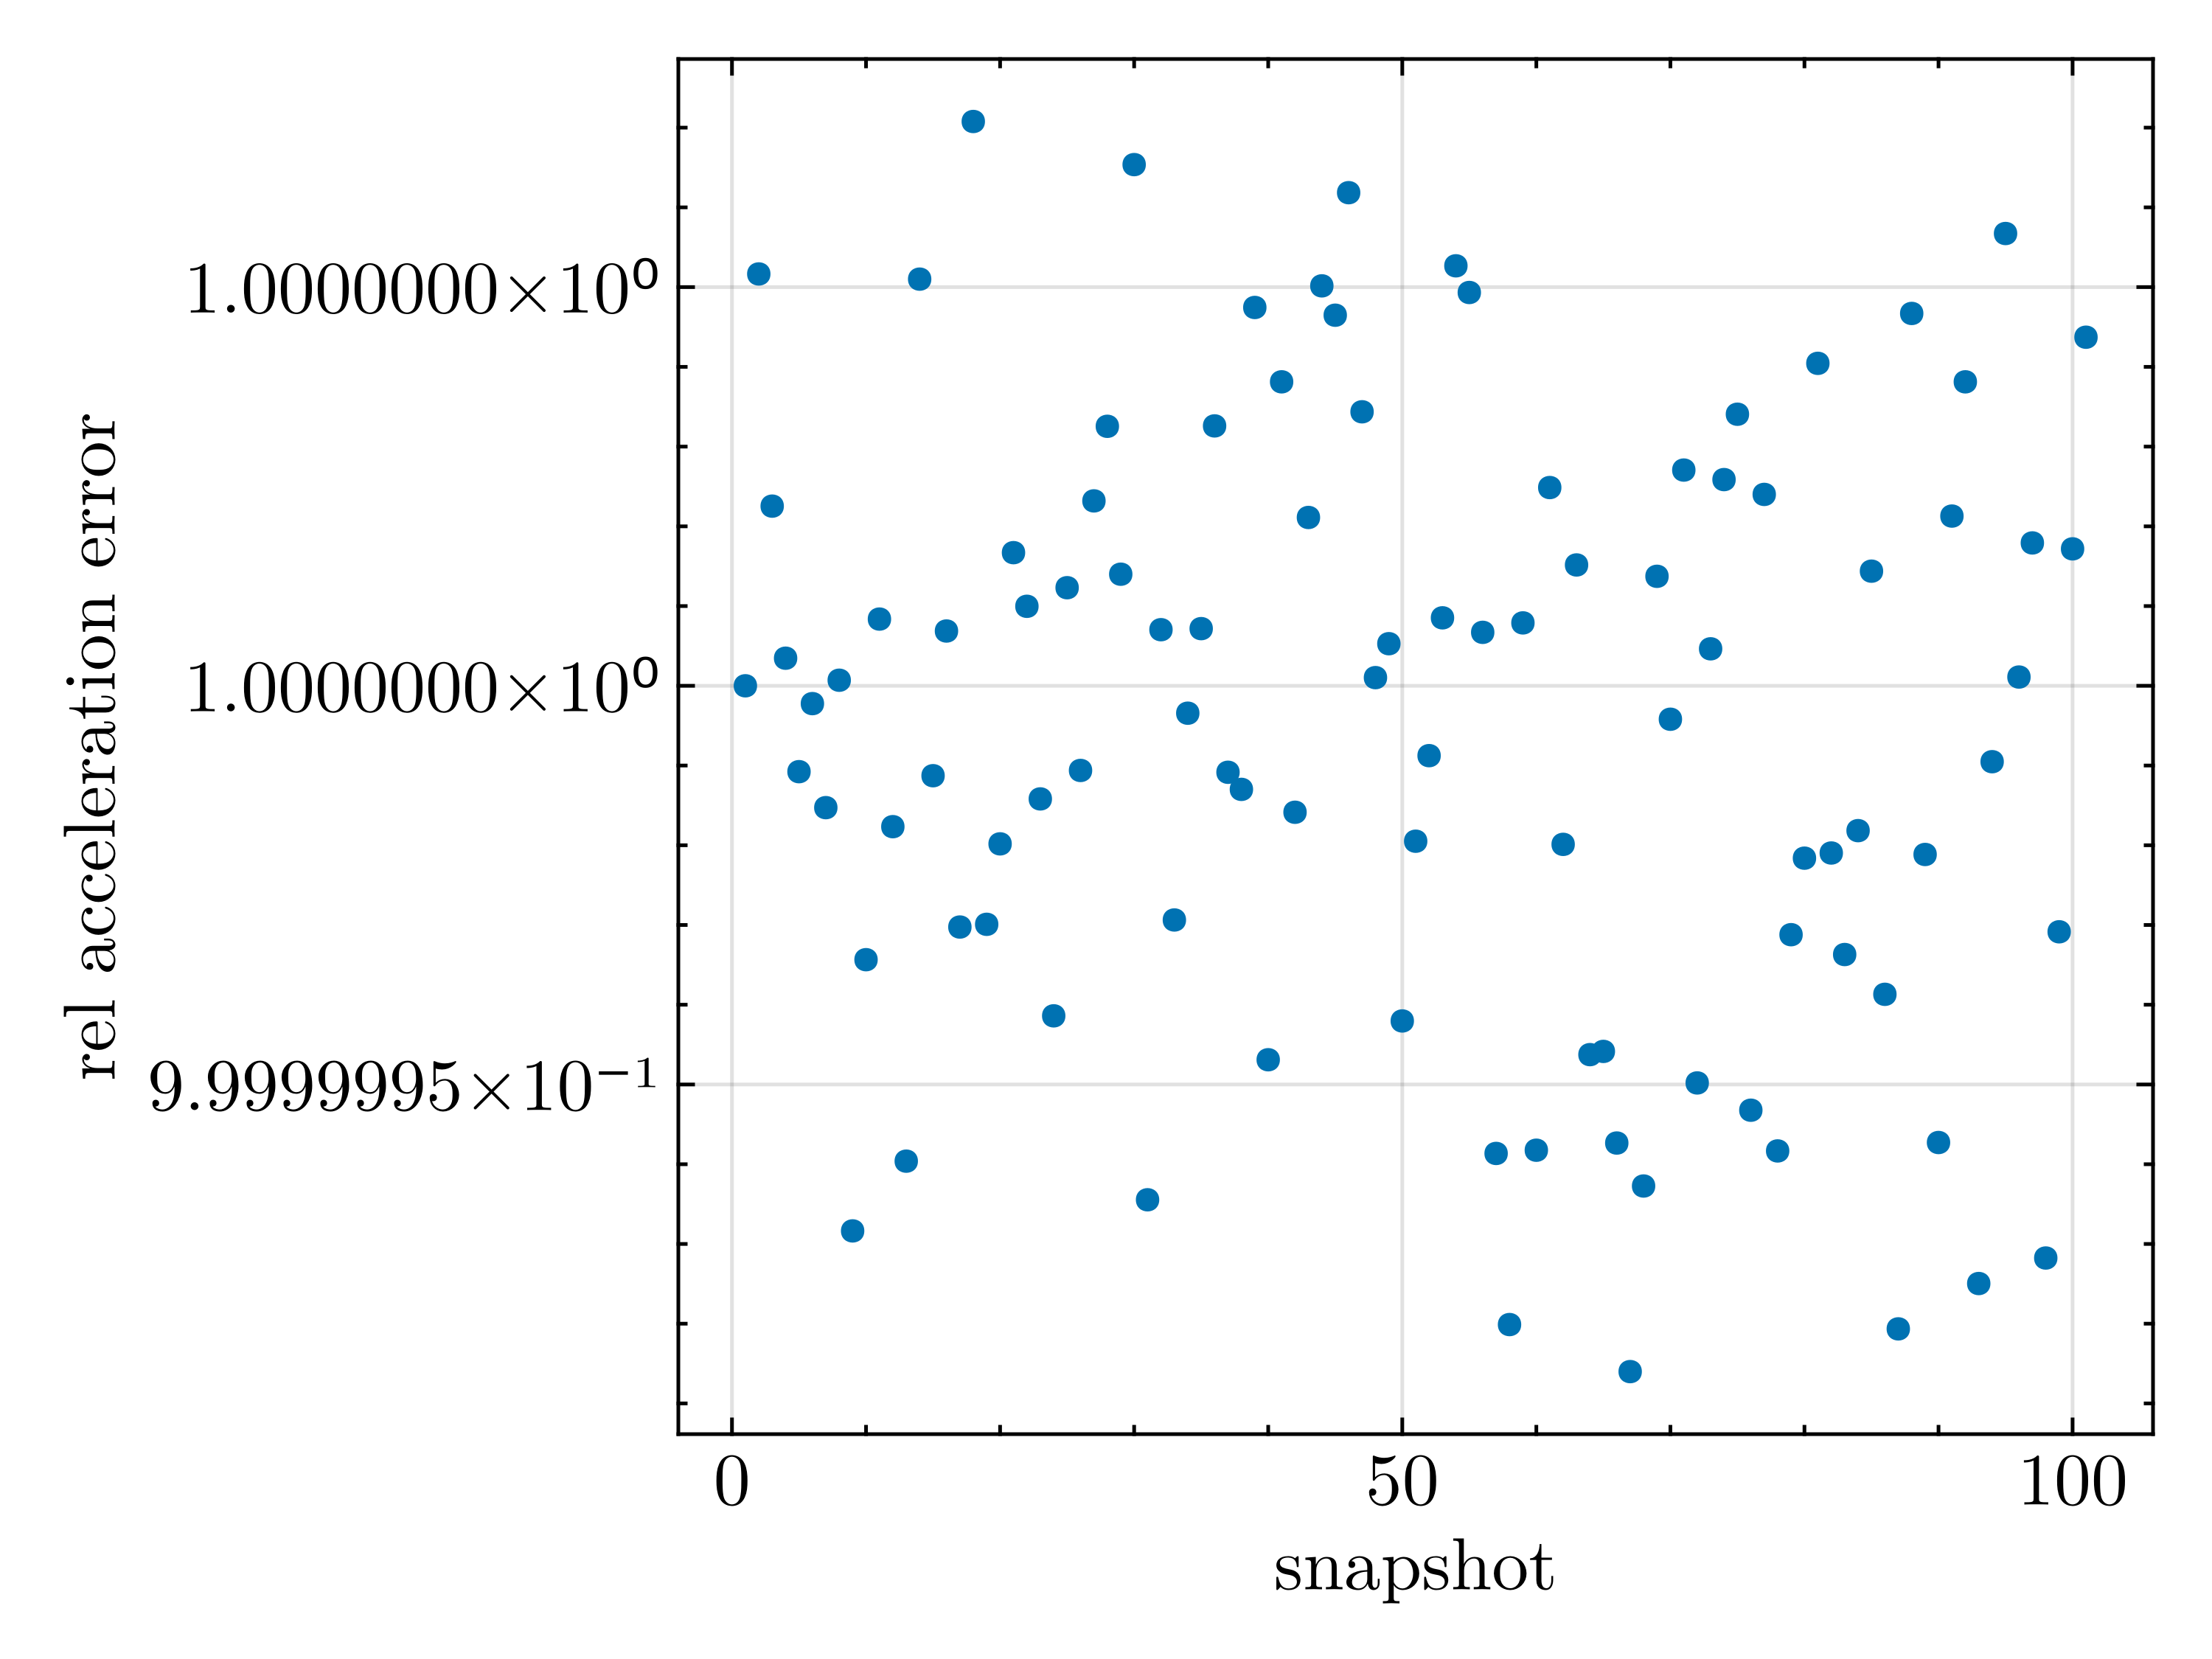

In [11]:
fig, ax = FigAxis(
    ylabel="rel acceleration error",
    xlabel="snapshot"
    )

scatter!(1 ./ r12 .^ 2 ./ a)

fig

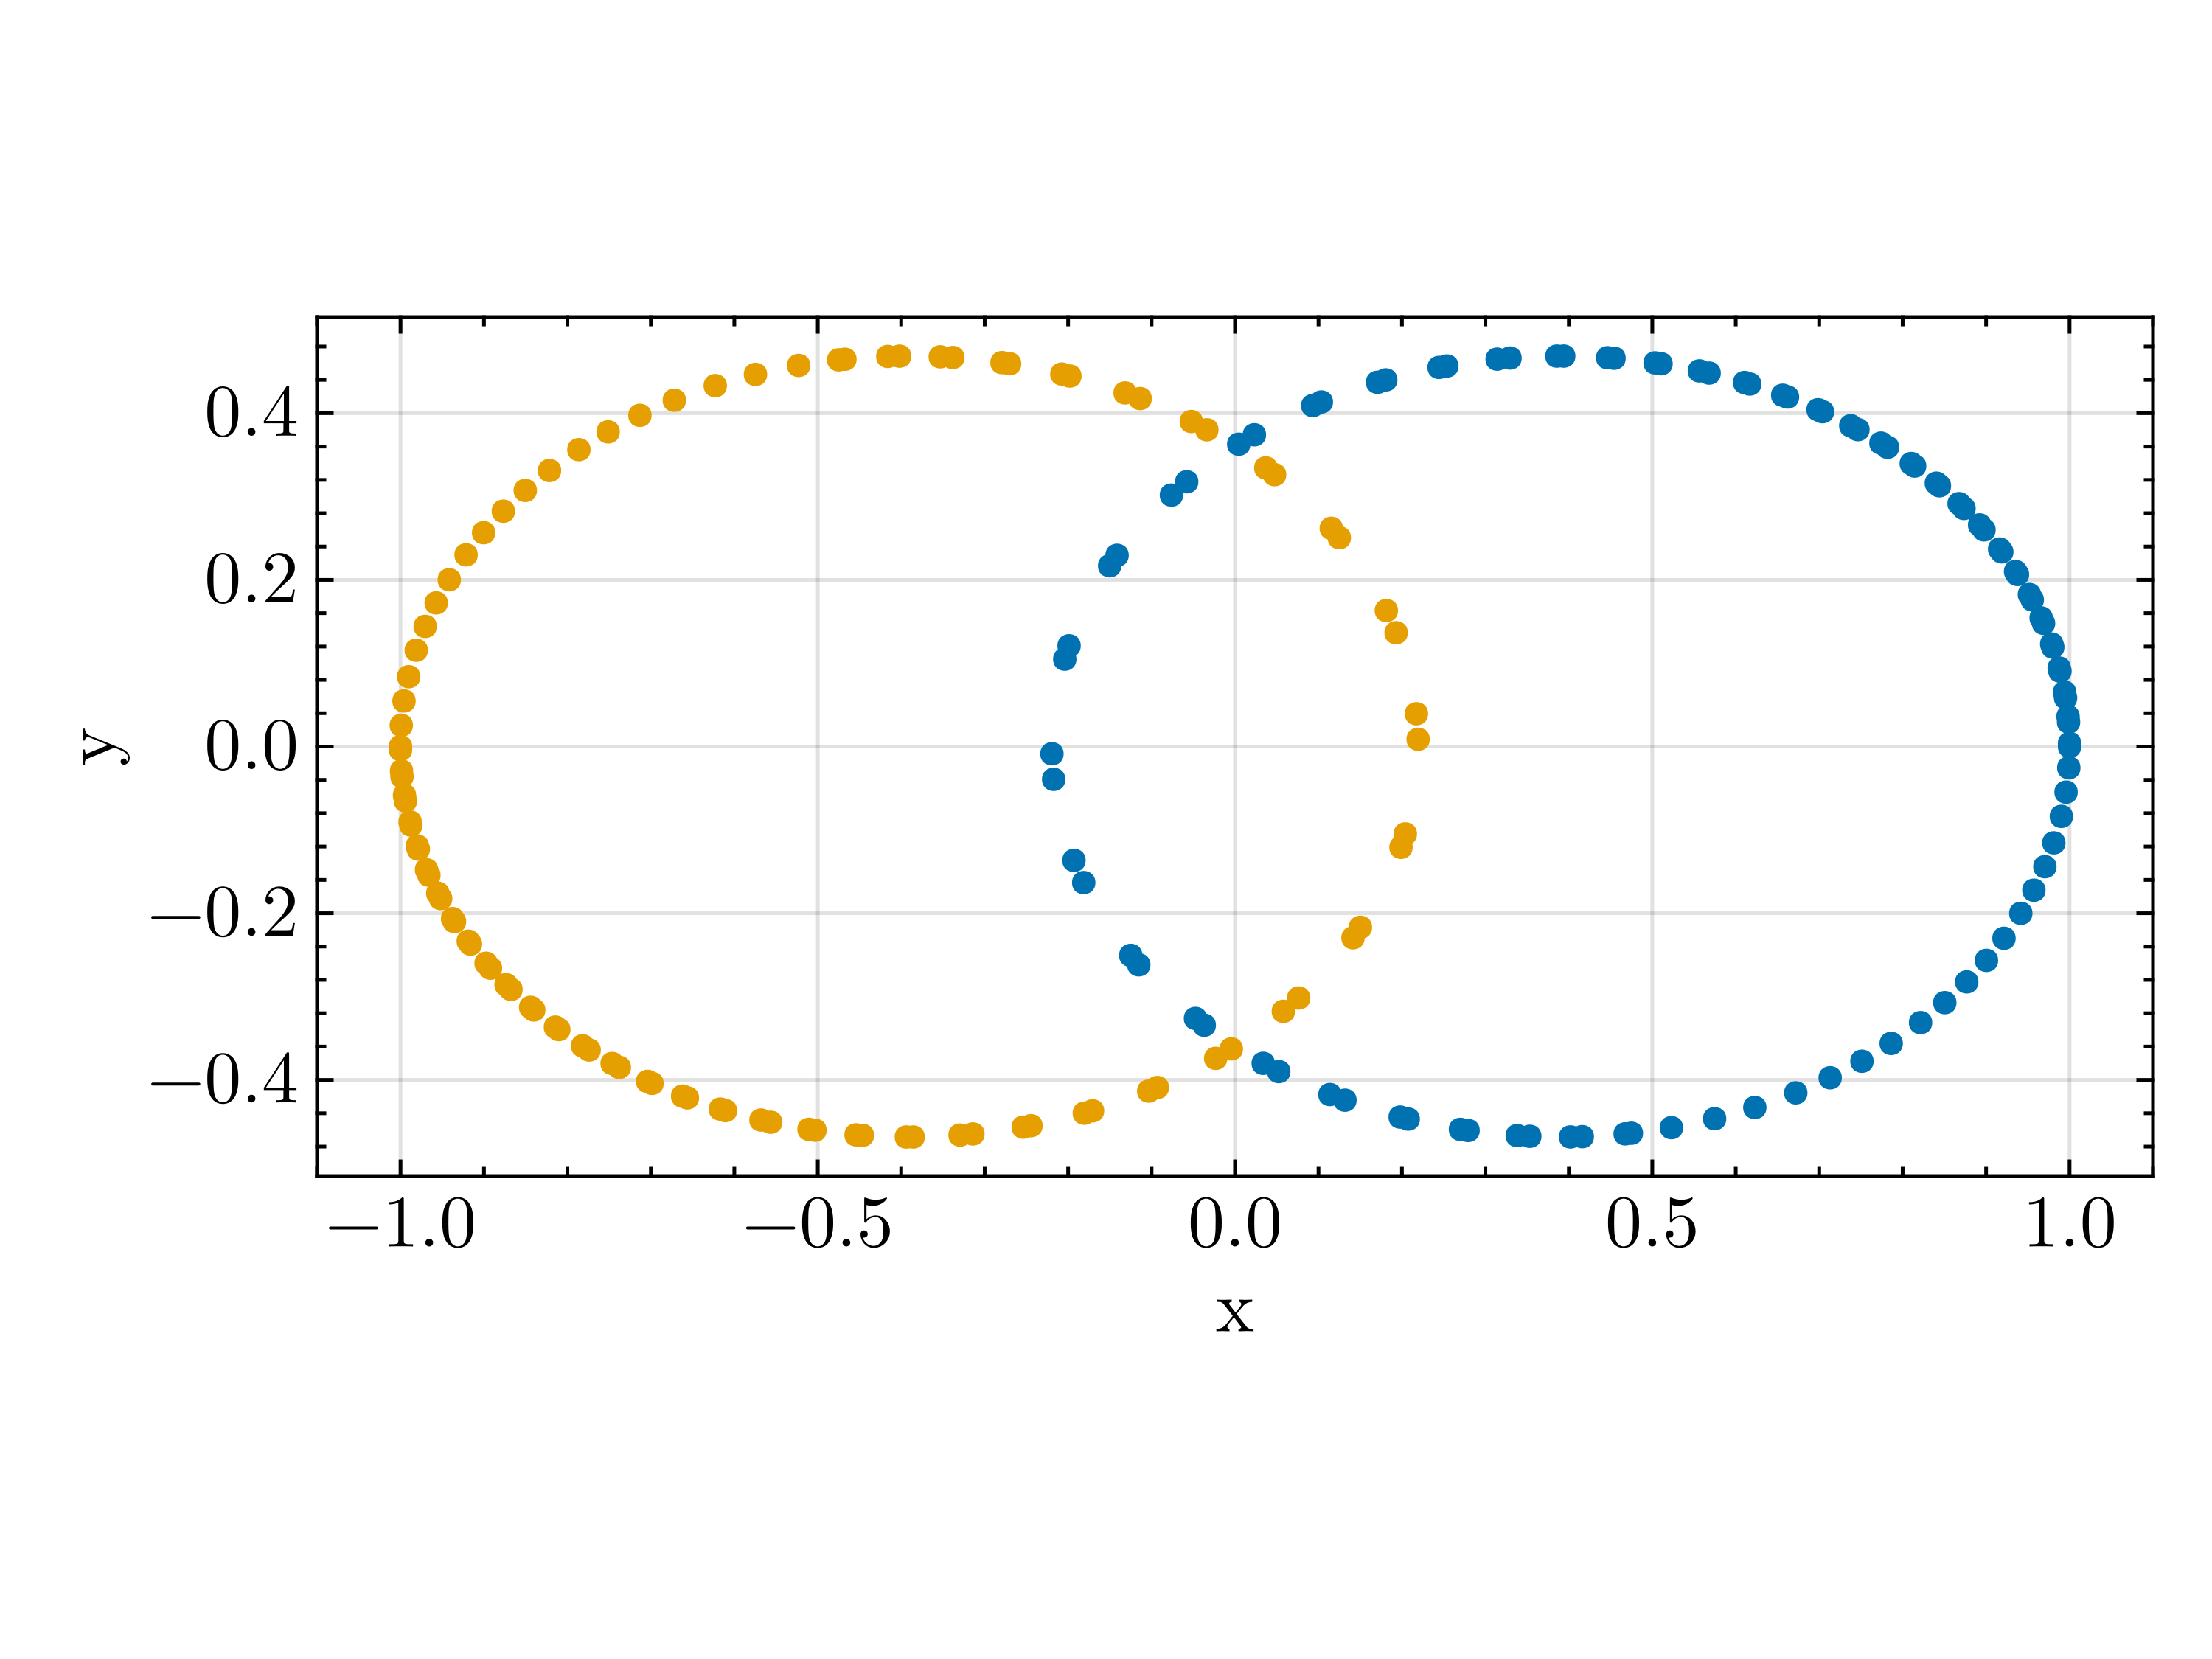

In [12]:
fig, ax = FigAxis(
    aspect=DataAspect(),
    xlabel="x",
    ylabel="y"
)

for i in 1:2
    scatter!(pos[1, i, :], pos[2, i, :])
end


fig

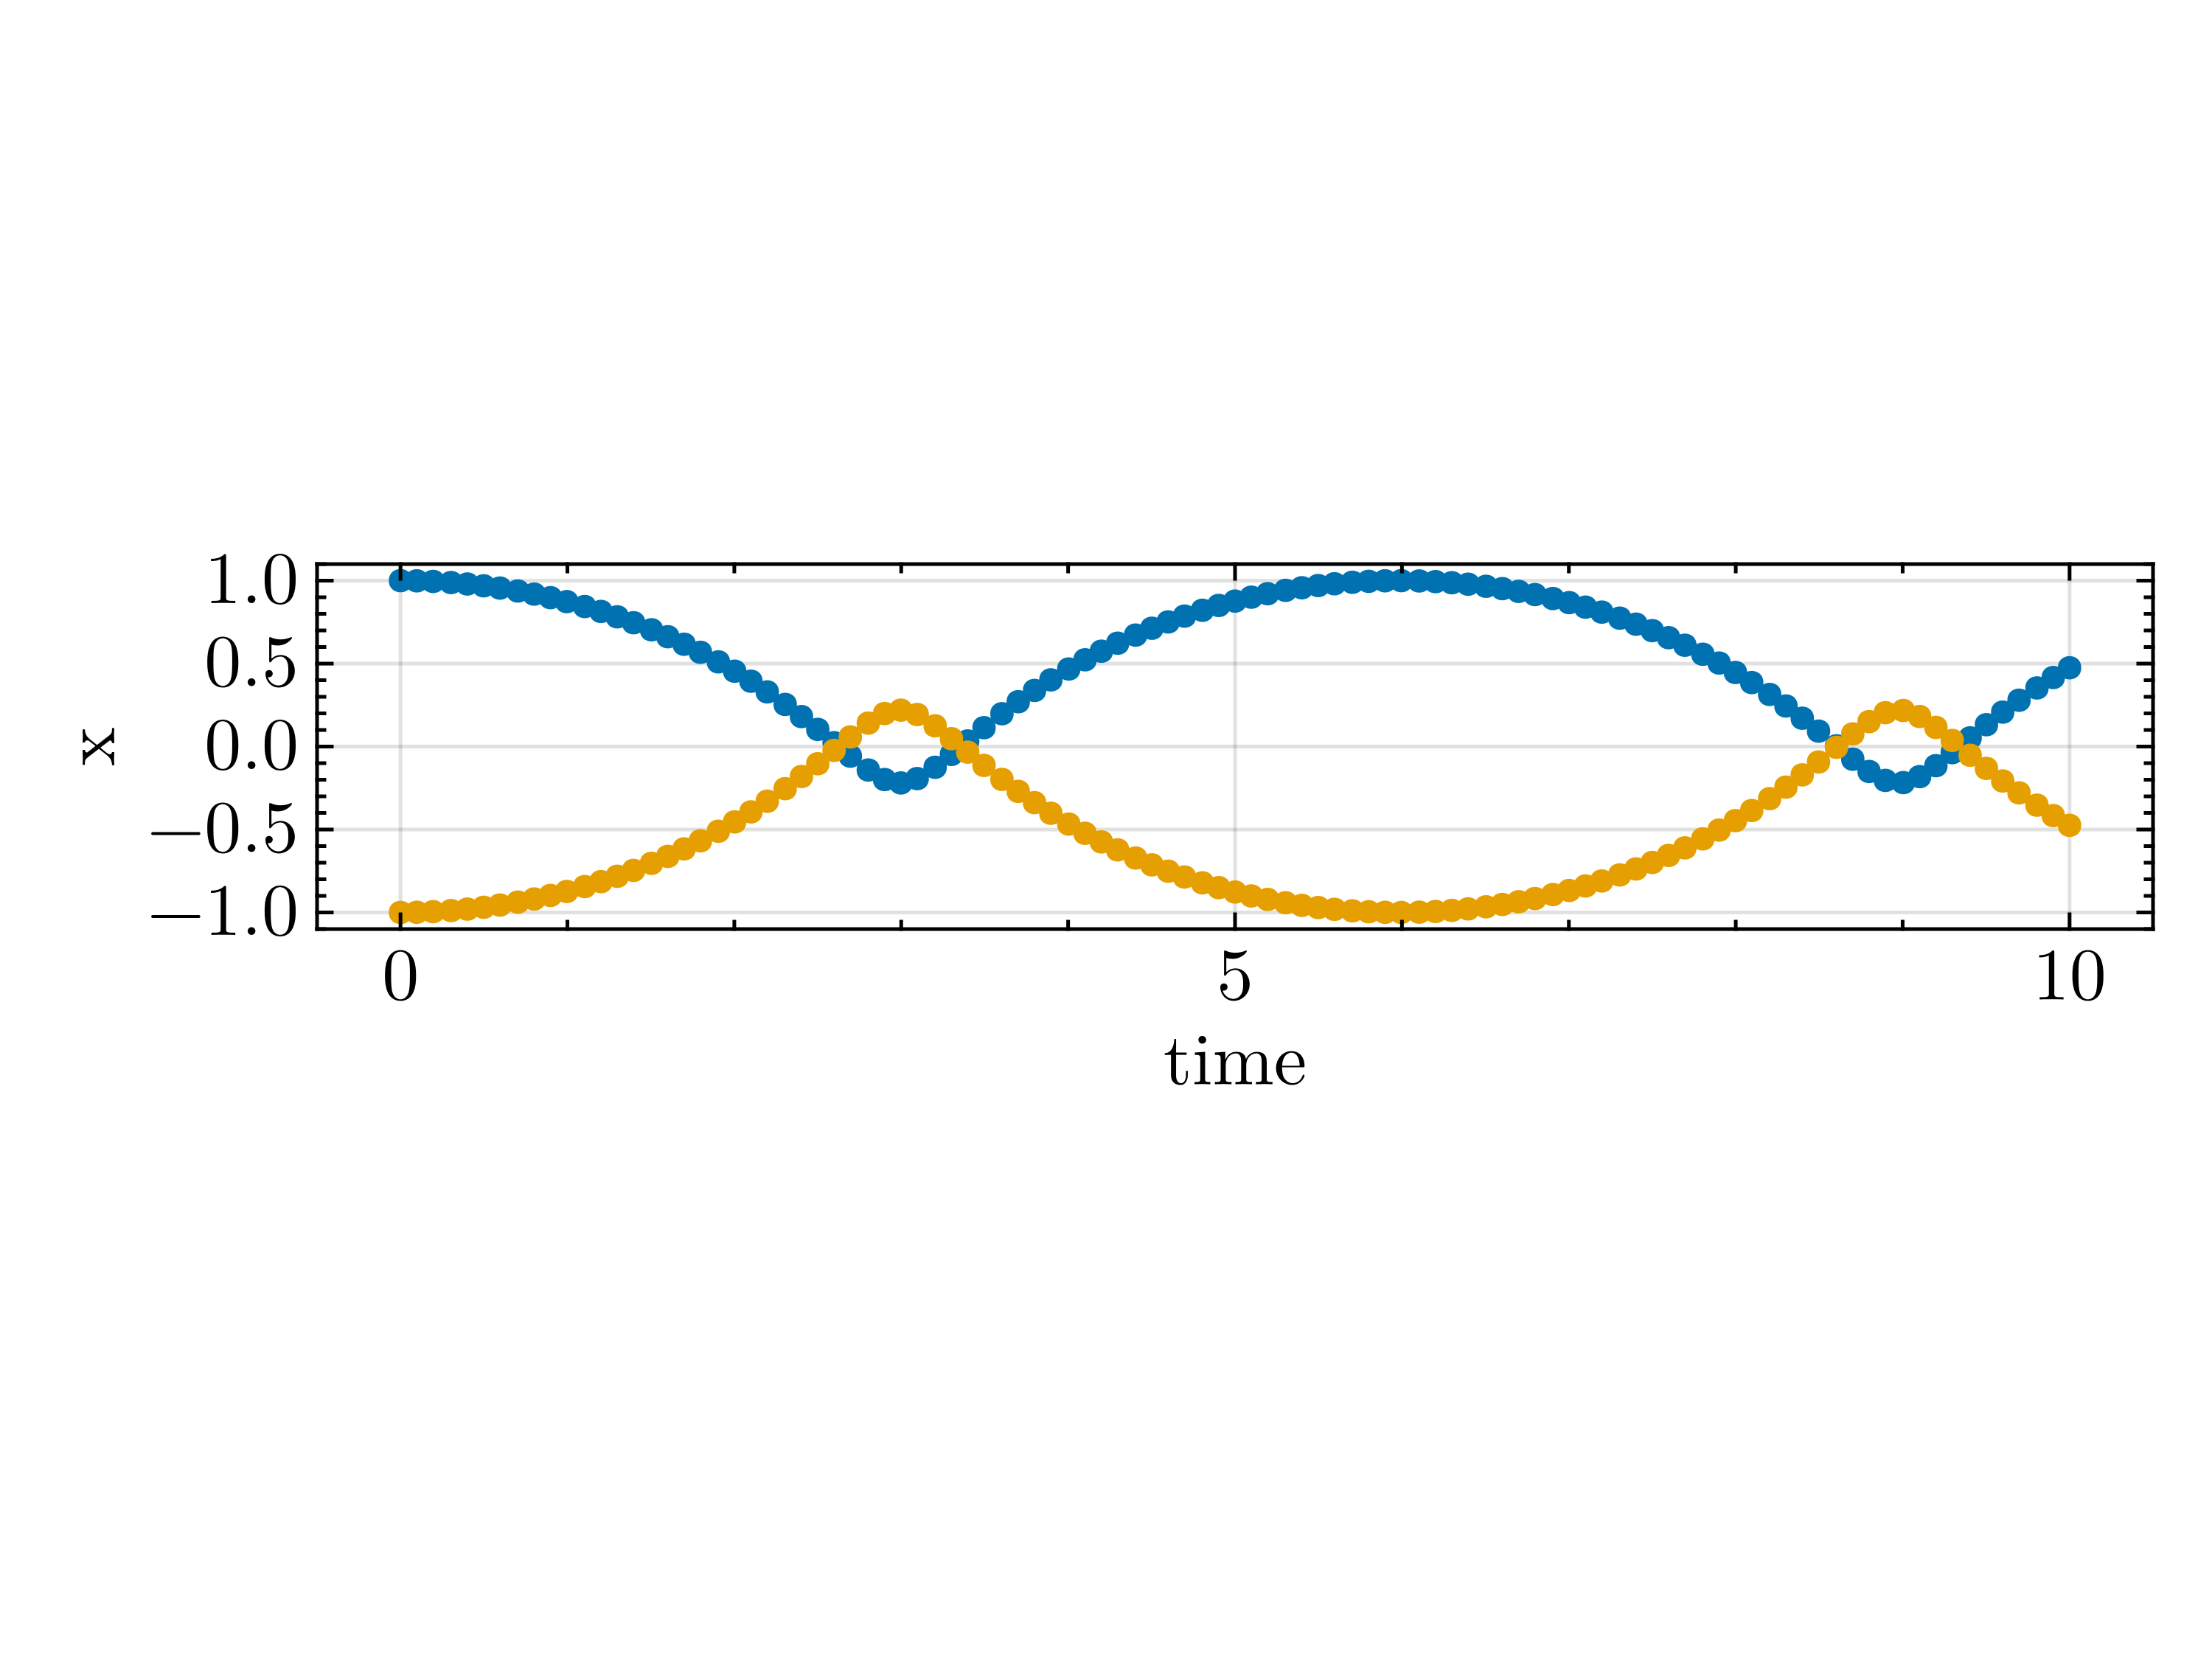

In [13]:
fig, ax = FigAxis(
    aspect=DataAspect(),
    xlabel="time",
    ylabel="x"
)

for i in 1:2
    scatter!(out.times, pos[1, i, :])
end


fig

In [14]:
ke = [sum(lguys.calc_E_spec_kin(s) .* s.masses) for s in out]
te = [lguys.calc_E_tot(s) for s in out]
pe = [sum(s.Φs .* s.masses)/2 for s in out];

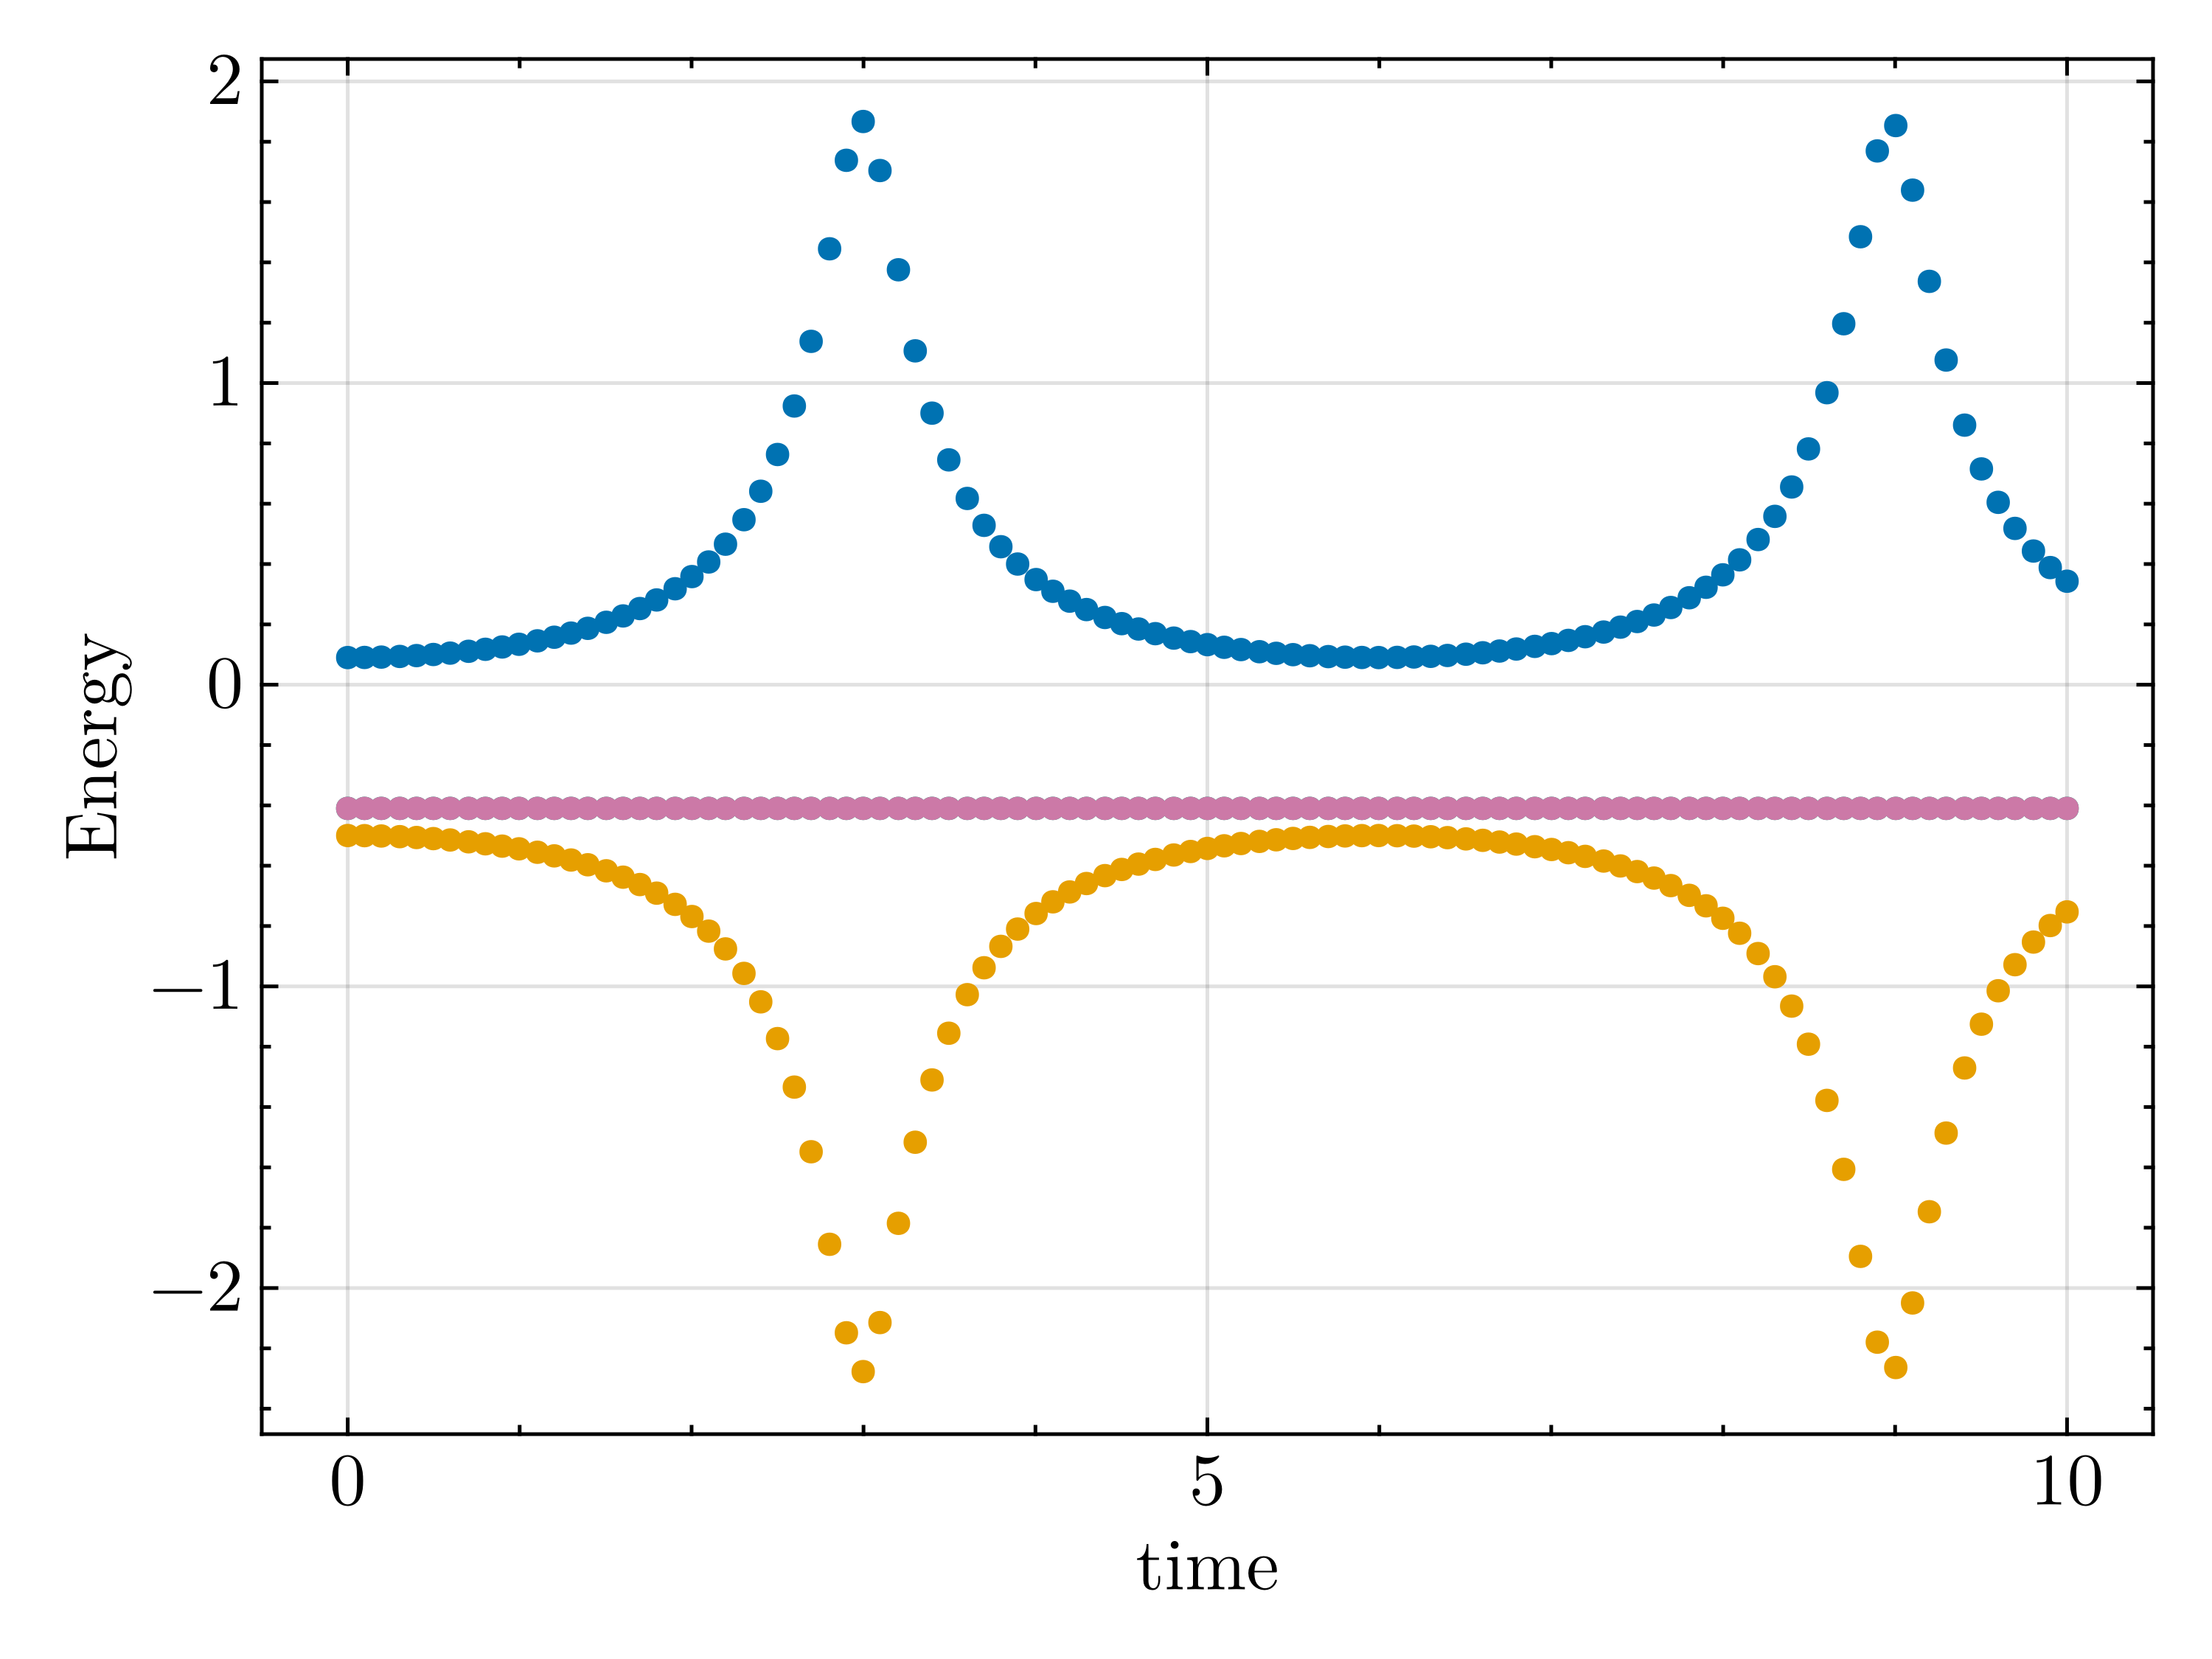

In [15]:
fig, ax = FigAxis(
    ylabel="Energy",
    xlabel="time"
)
scatter!(out.times, ke)
scatter!(out.times, pe)
scatter!(out.times, te)
scatter!(out.times, ke .+ pe)

fig

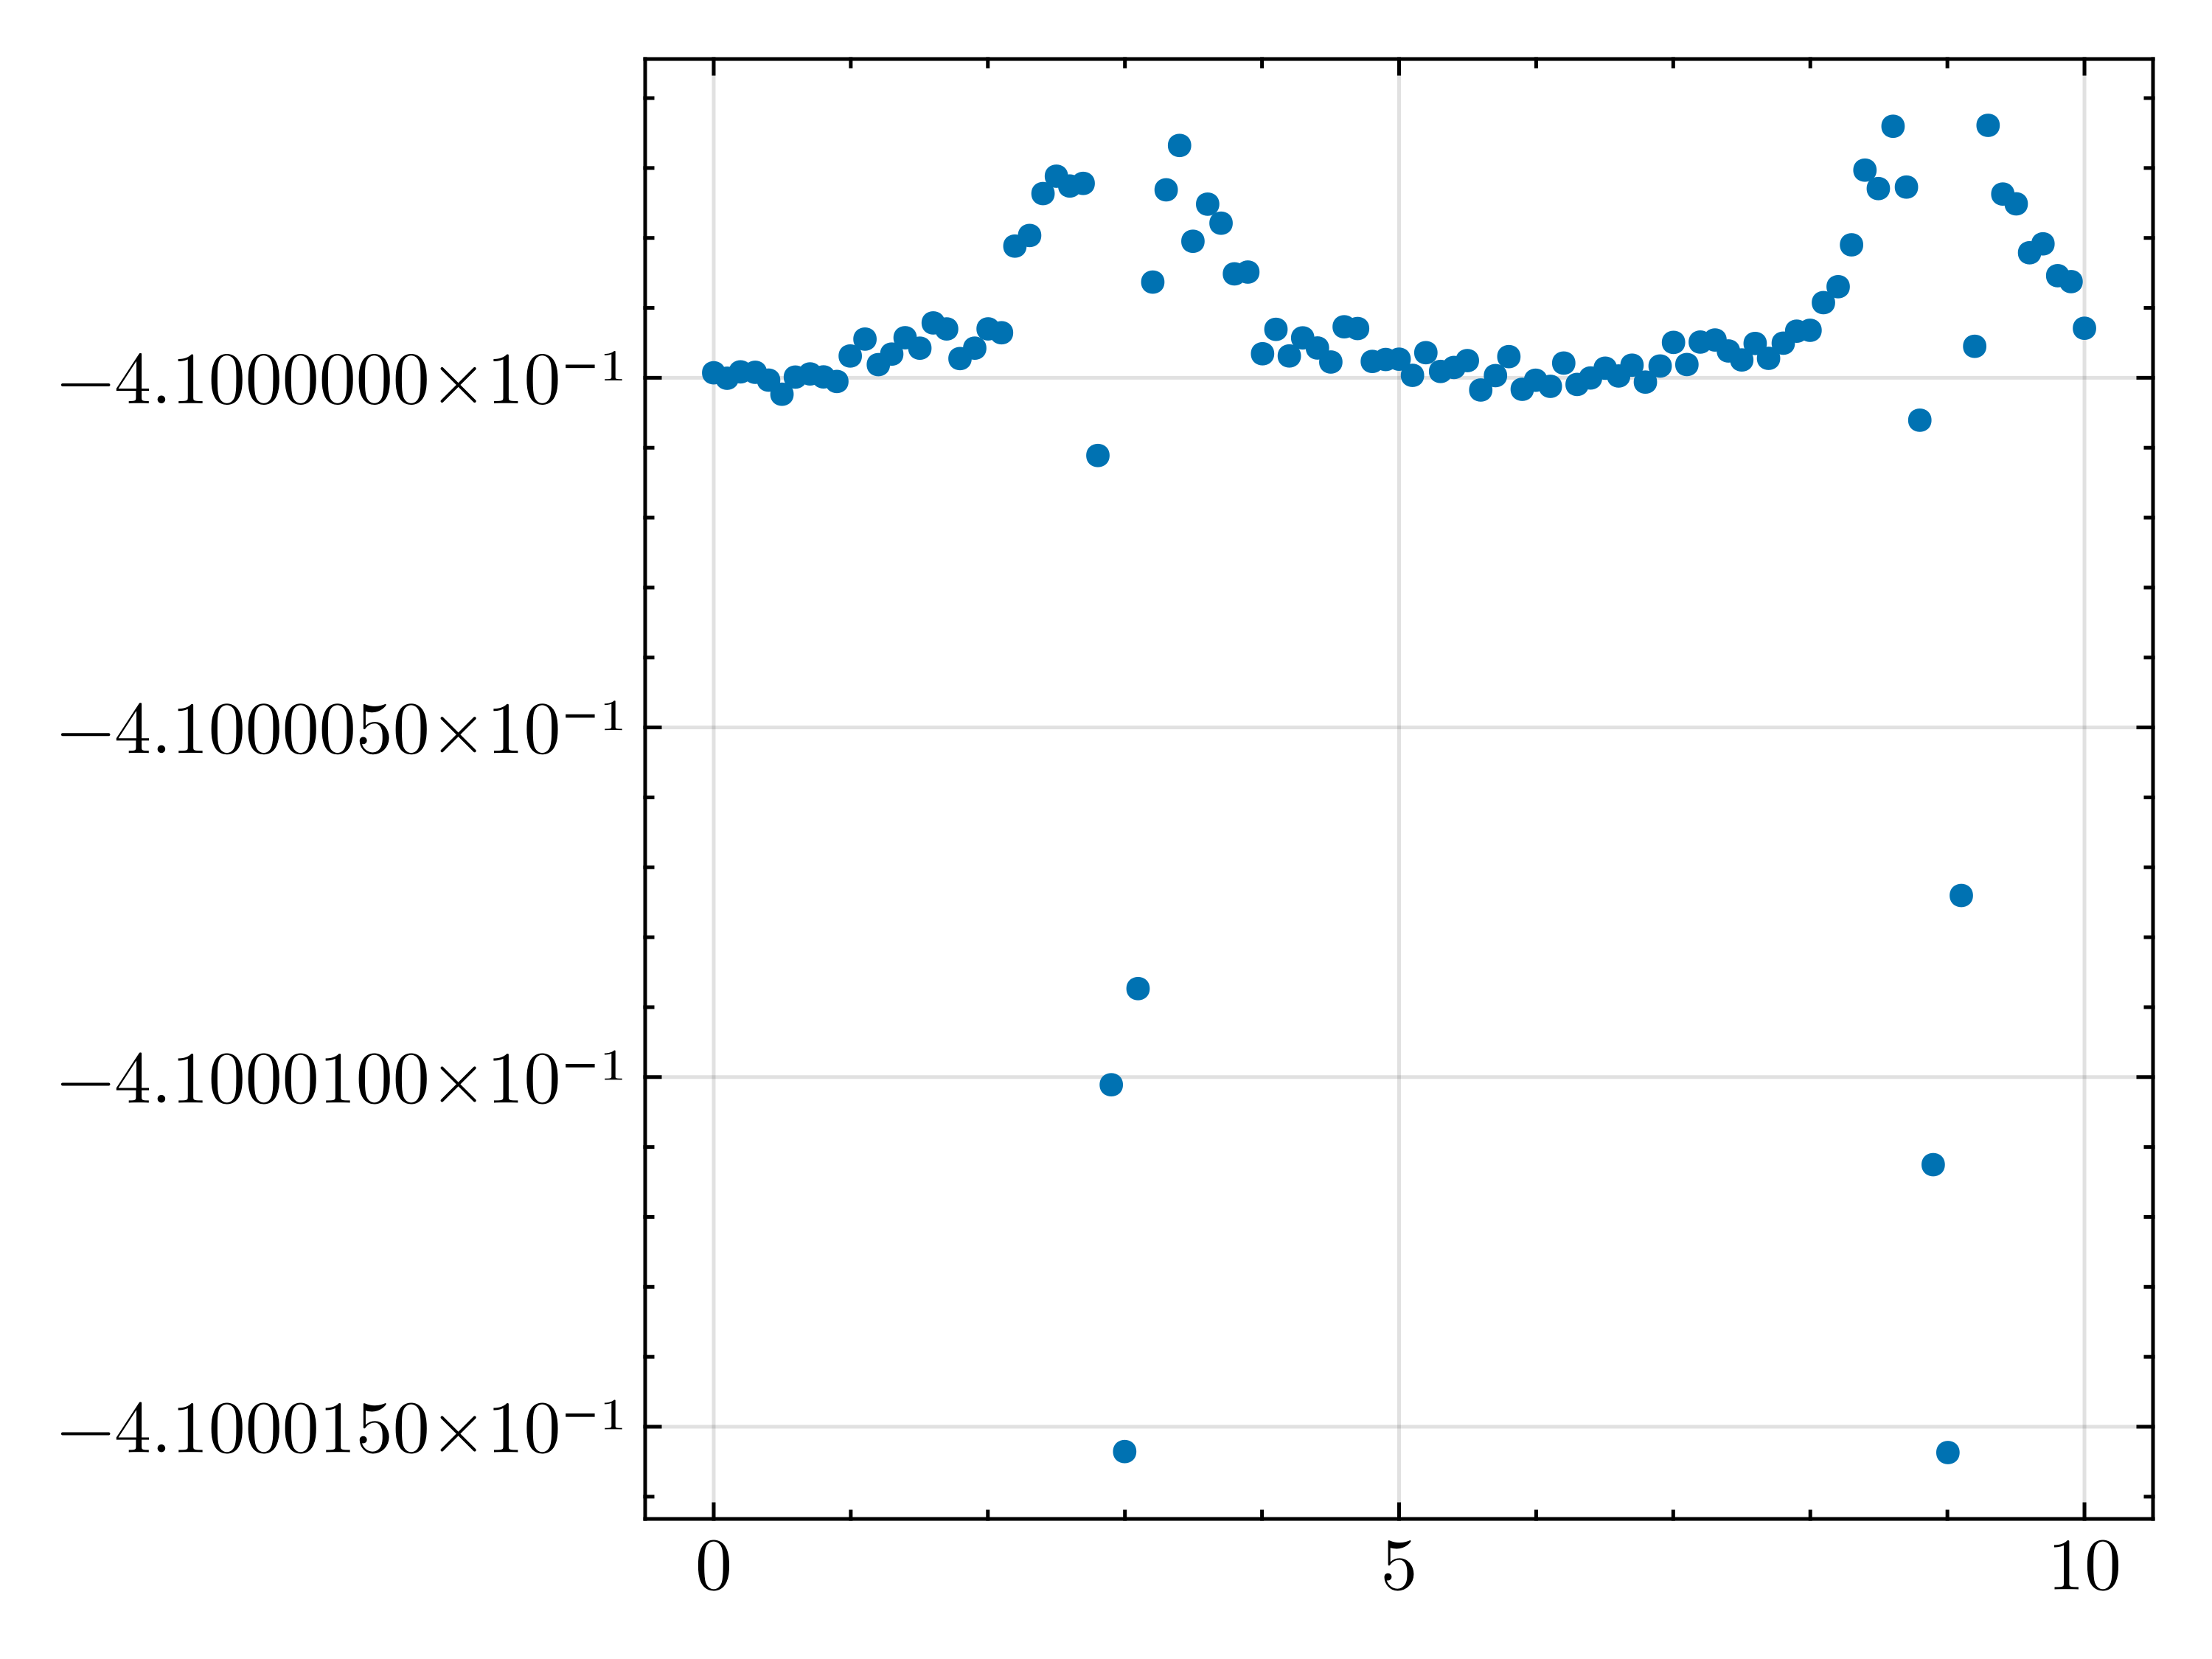

In [16]:
fig, ax = FigAxis()
scatter!(out.times, te)
fig

Kepler's third law is 
$$
P^2 = \frac{4\pi^2}{\mu} a^3
$$ 
where $\mu = G(m+m)$. 

In [17]:
out.times[sortperm(ke)]

101-element Vector{Float64}:
 0.0
 5.99609375
 5.8984375
 0.09765625
 6.103515625
 5.80078125
 0.1953125
 6.201171875
 5.703125
 0.302734375
 6.298828125
 5.595703125
 0.400390625
 ⋮
 2.6953125
 8.701171875
 9.19921875
 3.203125
 2.802734375
 8.798828125
 9.1015625
 3.095703125
 2.900390625
 8.896484375
 9.00390625
 2.998046875

In [18]:
P = ans[end-1] - ans[end]

6.005859375

In [19]:
maximum(pos[1, 1, :])

1.0

In [20]:
minimum(pos[1, 1, :])

-0.2194070965051651

In [21]:
# reduced mass
μ = out[1].masses[1]/2

# M1 frame
r12 = lguys.calc_r(pos[:, 1, :] .- pos[:, 2, :])
a = (maximum(r12) - minimum(r12)) / 2

0.7804201158590093

In [22]:
P, (out.times[2] - out.times[1])

(6.005859375, 0.09765625)

In [23]:
2π /μ^(1/2)  * a^(3/2)

6.126148906166726

# Threebody

In [24]:
out = lguys.Output("../models/tests/threebody/out/combined.hdf5")

<output with 101 snapshots of 3 particles>

In [25]:
pos = lguys.extract_vector(out, :positions)

3×3×101 Array{Float64, 3}:
[:, :, 1] =
  0.970004     -0.970004     -4.30768e-16
 -0.243088      0.243088     -4.30768e-16
 -4.30768e-16  -4.30768e-16  -4.30768e-16

[:, :, 2] =
  1.01         -0.91845      -0.0915508
 -0.199695      0.283506     -0.0838101
 -4.30768e-16  -4.30768e-16  -4.30768e-16

[:, :, 3] =
  1.03991      -0.853956     -0.185953
 -0.154849      0.318516     -0.163667
 -4.30768e-16  -4.30768e-16  -4.30768e-16

;;; … 

[:, :, 99] =
 -1.06474       0.755389      0.309515
 -0.0989655     0.349066     -0.250323
 -4.30768e-16  -4.30768e-16  -4.30768e-16

[:, :, 100] =
 -1.07632       0.661344      0.415148
 -0.0533395     0.358105     -0.304993
 -4.30768e-16  -4.30768e-16  -4.30768e-16

[:, :, 101] =
 -1.08085       0.557922      0.523106
 -0.0077091     0.348758     -0.341283
 -4.30768e-16  -4.30768e-16  -4.30768e-16

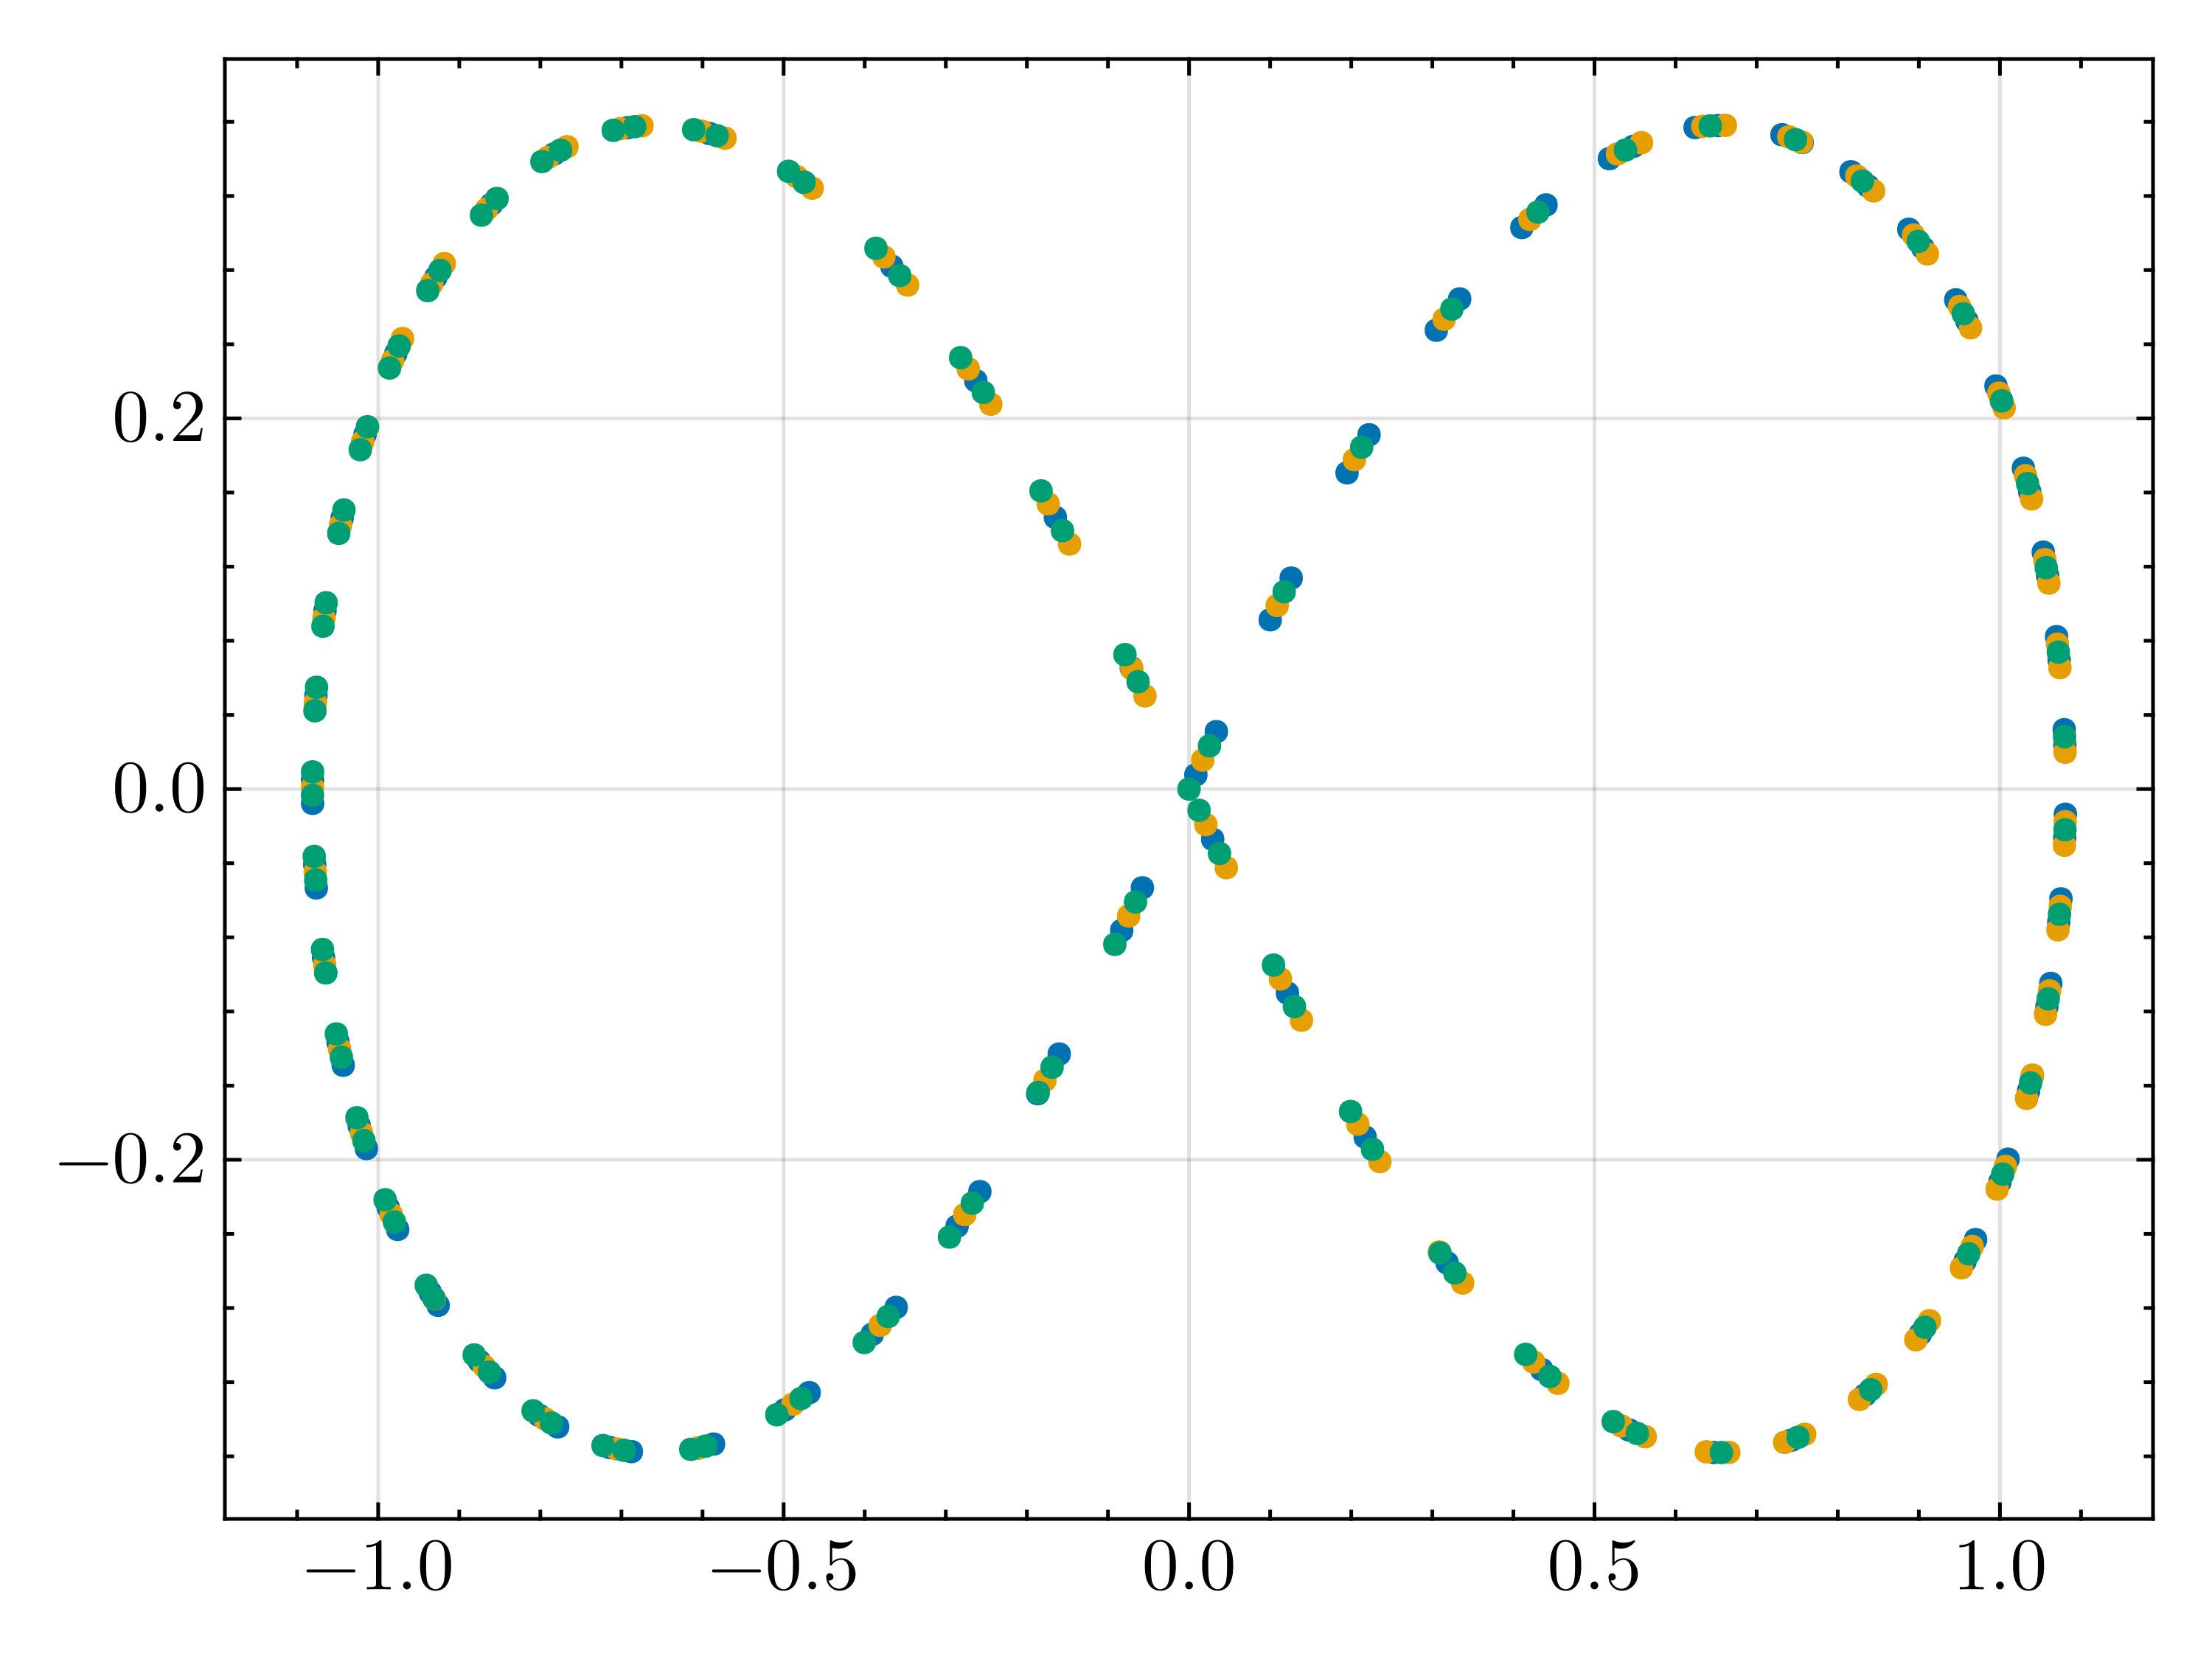

In [26]:
fig, ax = FigAxis()

for i in 1:3
    scatter!(pos[1, i, :], pos[2, i, :])
end

fig

In [27]:
ke = [sum(lguys.calc_E_spec_kin(s) .* s.masses) for s in out]
te = [lguys.calc_E_tot(s) for s in out]
pe = [sum(s.Φs .* s.masses)/2 for s in out];

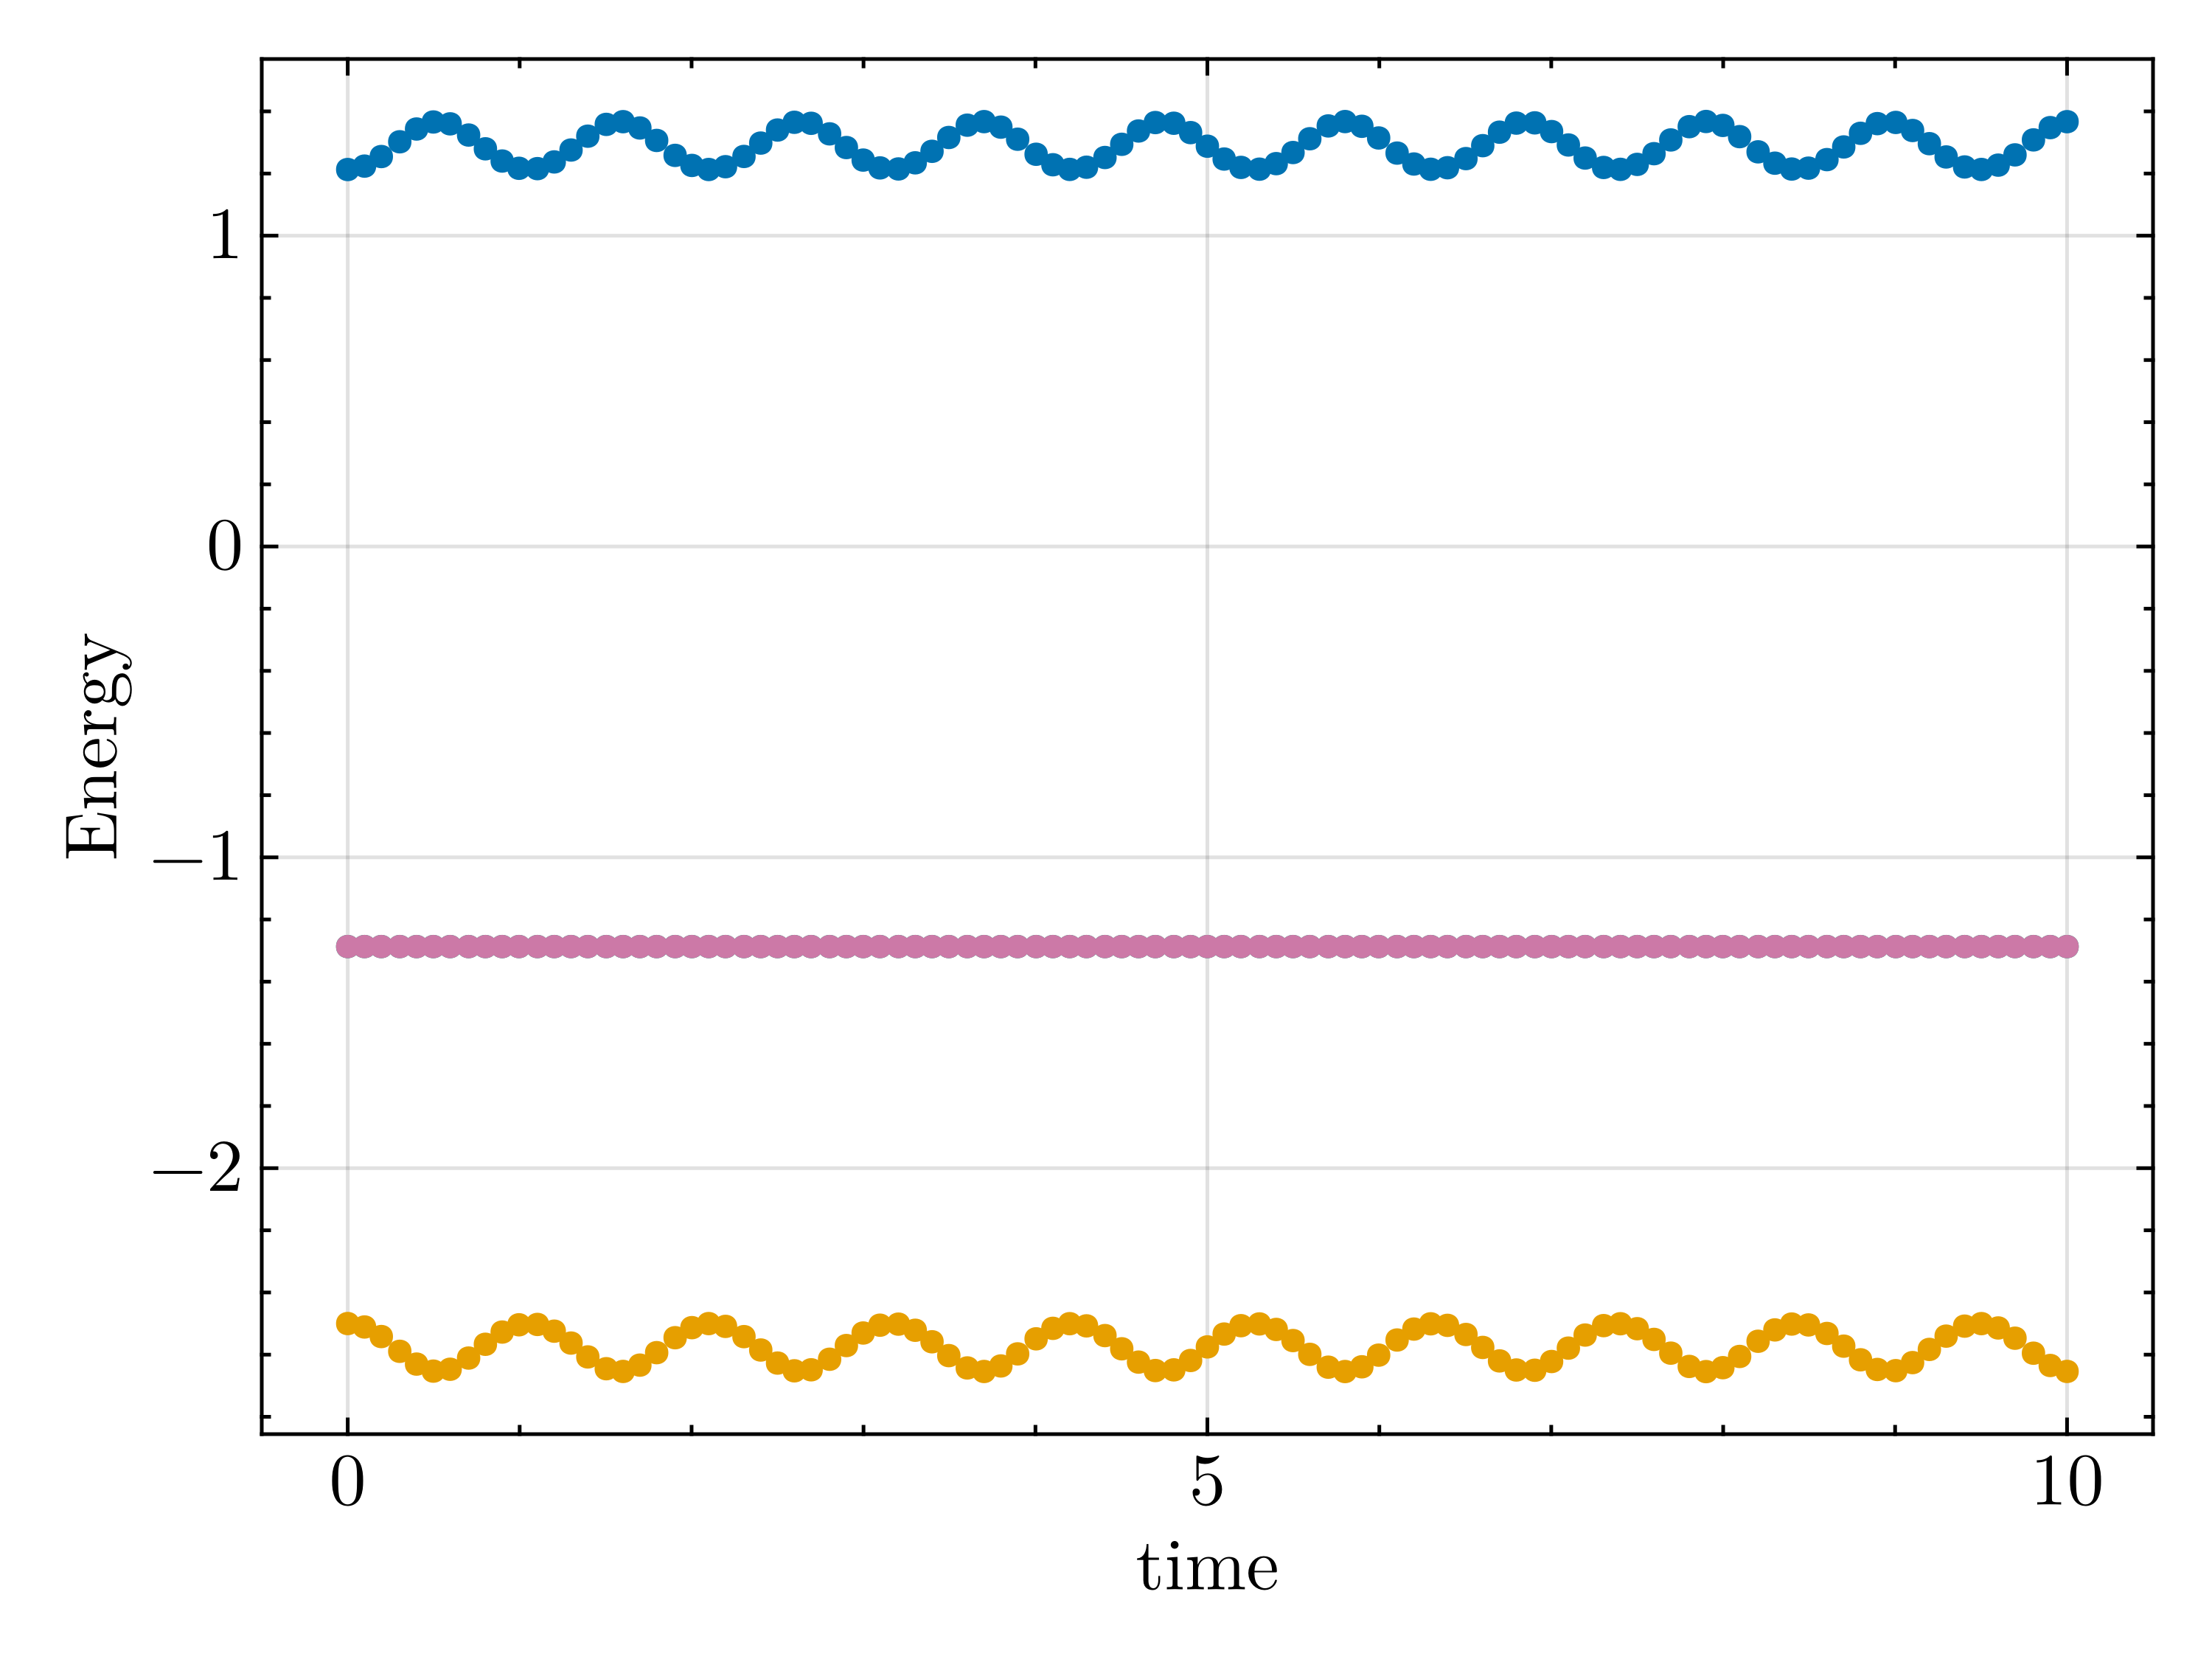

In [28]:
fig, ax = FigAxis(
    ylabel="Energy",
    xlabel="time"
)
scatter!(out.times, ke)
scatter!(out.times, pe)
scatter!(out.times, te)
scatter!(out.times, ke .+ pe)

fig